# Funnel Analysis

### Loading Data

In [37]:
from lib import *
import pandas as pd

engine, df = load_data()

In [14]:
# query = """ 
# SELECT * from raw_orders limit 3
# """
# pd.read_sql(query, engine).columns

# 'list_sku_category', 'list_sku_flavor', 'order_coupon_code', 'order_referrer'

* What is the first purchase of users who repeat in comparison to users who do not repeat?

In [38]:


query = """
WITH orders_count AS (
    SELECT user_id, list_sku, list_sku_category, list_sku_flavor, 
    order_coupon_code, order_referrer, order_channel, order_ad_shown,
    order_is_freeshipping, order_coupon_code, user_loyalty_program, order_value,
       COUNT(user_id) OVER
         (PARTITION BY user_id ORDER BY order_date)
         AS running_order_count,
        COUNT(user_id) OVER
         (PARTITION BY user_id)
         AS total_order_count
  FROM raw_orders
)
select * from orders_count 
where total_order_count = 2 and running_order_count = 1
"""
first_for_repurchases_df = pd.read_sql(query, engine)

Use the group and print to see if there is anything different about that first purchase.

list_sku


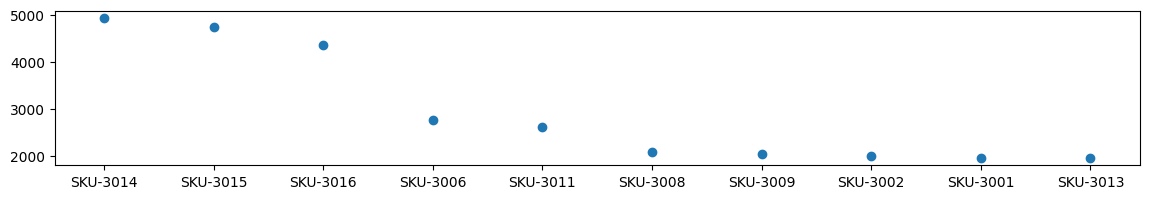

list_sku_category


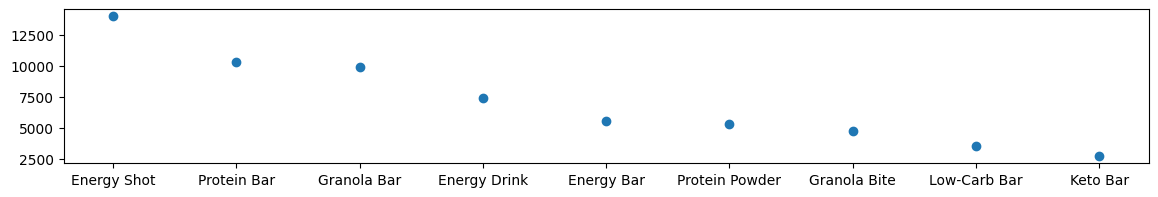

list_sku_flavor


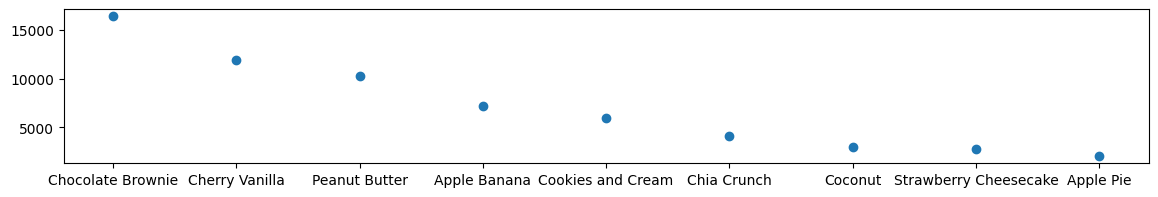

In [39]:
from lib import product_cols

group_and_print(first_for_repurchases_df, product_cols)


Attrition:

* What is the last purchase of users, in comparison to typical purchases.  

In [40]:
query = """
WITH orders_count AS (
    SELECT list_sku, list_sku_category, list_sku_flavor, order_value,
       COUNT(user_id) OVER
         (PARTITION BY user_id ORDER BY order_date)
         AS running_order_count,
        COUNT(user_id) OVER
         (PARTITION BY user_id)
         AS total_order_count
  FROM raw_orders
)
select * from orders_count 
where running_order_count = total_order_count
"""

last_purchase_df = pd.read_sql(query, engine)


list_sku


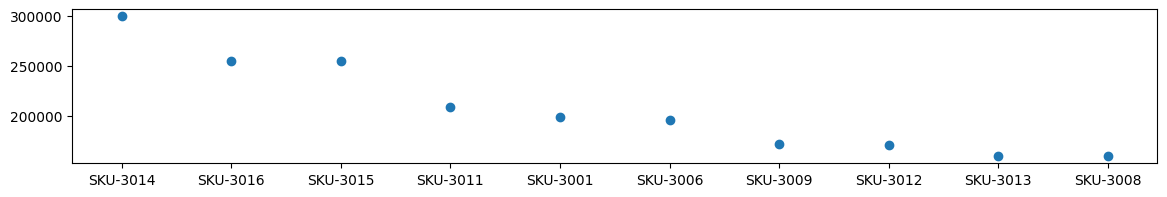

list_sku_category


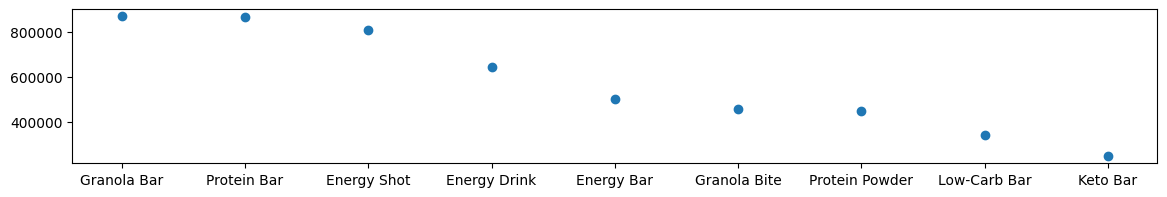

list_sku_flavor


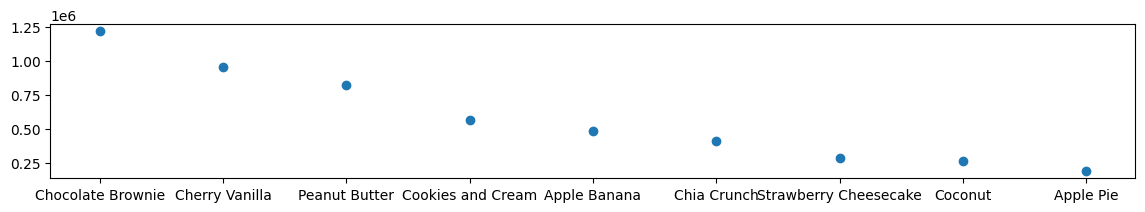

In [41]:
group_and_print(last_purchase_df, product_cols)

* Thoughts

* Granola is often the last item purchased, but it is also an item of non-power users.  So unclear if there's cause and effect here.  Could be that casual users buy the granola bars.

* Still an energy shot is a popular first product for customers who end up repeating.  Again, difficult to determine cause and effect.  But buying an energy shot may be a good predictor of a repeat customer.  

* Unclear how effective the loyalty program is.  Few customers are gold members.  The most popular is silver followed by none.  Which could indicate that users in general are not getting much out of it.  Could be worth looking at effectiveness, and what core users would want out of a loyalty program.
